In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [6]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [7]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0]

3

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 24ms/step - loss: 2.1737 - accuracy: 0.5492 - val_loss: 1.3965 - val_accuracy: 0.6900
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 1.1694 - accuracy: 0.7337 - val_loss: 1.1525 - val_accuracy: 0.7510
Epoch 3/8
16/16 [==============================] - 0s 13ms/step - loss: 0.8371 - accuracy: 0.8155 - val_loss: 1.0128 - val_accuracy: 0.7810
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.5940 - accuracy: 0.8716 - val_loss: 0.9586 - val_accuracy: 0.7990
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4344 - accuracy: 0.9035 - val_loss: 0.9129 - val_accuracy: 0.8250
Epoch 6/8
16/16 [==============================] - 0s 13ms/step - loss: 0.3369 - accuracy: 0.9260 - val_loss: 1.3131 - val_accuracy: 0.7210
Epoch 7/8
16/16 [==============================] - 0s 14ms/step - loss: 0.2569 - accuracy: 0.9391 - val_loss: 0.9781 - val_accuracy: 0.8100
Epoch 8/8
71/71 [===

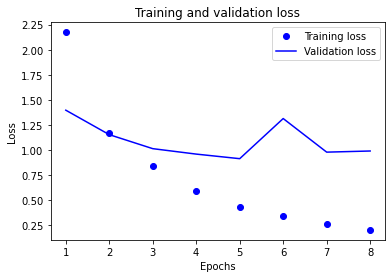

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

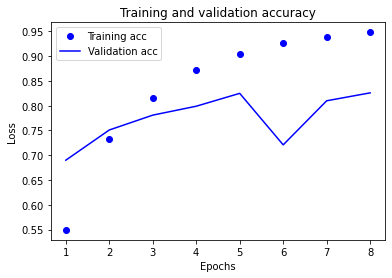

In [19]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
results

[1.0722694396972656, 0.7867319583892822]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

0.9999999

In [25]:
np.argmax(predictions[0])

3